### Find out two best markets (country) to advertise Web and Mobile development courses for an e-learning company.
<br>
We will use freeCodeCamp's 2017 New Coder survey data, as freeCodeCamp is also e-learning platform that provide courses in mobile and web development. 

The survey data is stored as 2017-fCC-New-Coders-Survey-Data.csv

Lets first explore the data.


In [109]:
import pandas as pd
import numpy as np

In [110]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data.head()

From the survey we would like to explore the following:
* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.
<br>
<br>

First we need to ensure the dataset is representative of the targeted population by analysing JobRoleInterest column and creat a frequency distribution table

Courses offered are mainly specialize in web and mobile development. As well as data Science and game developer. 

In [112]:
data['JobRoleInterest'].value_counts(normalize=True, dropna=False).head(15)*100

NaN                                                                            61.529574
Full-Stack Web Developer                                                        4.528198
  Front-End Web Developer                                                       2.475928
  Data Scientist                                                                0.836314
Back-End Web Developer                                                          0.781293
  Mobile Developer                                                              0.643741
Game Developer                                                                  0.627235
Information Security                                                            0.506190
Full-Stack Web Developer,   Front-End Web Developer                             0.352132
  Front-End Web Developer, Full-Stack Web Developer                             0.308116
  Product Manager                                                               0.302613
Data Engineer        

The frequency table indicated 61 percent of participate did not provide response for job interest.

It also indicates some participants are interest in more than 1 job role.
<br>
Lets explore the the ratio of people interested in Web or Mobile Development.

In [113]:
data['WebOrMobile'] = data['JobRoleInterest'].str.contains('Web Developer|Mobile Developer', regex=True)
data['WebOrMobile'].value_counts(normalize=True)*100

True     86.241419
False    13.758581
Name: WebOrMobile, dtype: float64

Out of the 39 percent participants who provided Job Interest, around 89 percent selected Mobile or Web Development as on of their job interest. We can be confident that this 39 percent of participant is representative of our targeted interest.
<br>

Lets explore the data further on the 61 percent participants who did not indicate job interest.
<br>
We notice columns for JobRoleInterest, lets extract these columns and explore them.

In [114]:
jobInterest_data = data[data['JobRoleInterest']== None][[col for col in data.columns if 'JobInterest' in col]]

Now we have a dataframe contains only JobInterest columns for the 61 percent of participant who did not indicate job interest. As mentiones earlier, the courses mainly forcus on Web and Mobile development. Lets count the percentage of participants indicated interest on these 2 areas. 

In [115]:
interest_area = ['JobInterestBackEnd','JobInterestFrontEnd','JobInterestFullStack','JobInterestMobile']
(jobInterest_data[interest_area].sum(axis=1)>=1).value_counts()

Series([], dtype: int64)

All null value, cannot find job interest for these participants.
<br>
Lets drop these rows (no indication of job interest).

In [116]:
data['JobRoleInterest'].head()

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

In [117]:
data = data[data['JobRoleInterest'].notnull()]
data.shape # confirm nan value dropped. 

(6992, 137)

Now lets explore where these participants(new coders) are located and the density for each area. 

In [118]:
data['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Croatia     

In [119]:
data['CountryLive'].value_counts(normalize=True)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Philippines                       0.760456
Serbia                            0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

45 percent of these new codes lives in USA, and 7.7 percent lives in india. 
<br>
Lets continue to find our how much money they willing to spend on subscription. MoneyForLearning column represent amount of money(USD) spent by participants since they started coding. 
<br>
We will only focus on participants who lives in USA, India, Canada and Poland, as they have the greatest absolute frequency.

Find out money spent per month

In [138]:
data['MonthsProgramming'].value_counts().sort_index().head() # need to remove the Zeros
data.loc[data['MonthsProgramming'] == 0,'MonthsProgramming'] = 1

In [139]:
data['MonthsProgramming'].value_counts().sort_index().head() #confirm all zeros removed

1.0    1002
2.0     669
3.0     637
4.0     367
5.0     279
Name: MonthsProgramming, dtype: int64

In [141]:
data['MoneyPerMonth'] = data['MoneyForLearning']/data['MonthsProgramming']
data['MoneyPerMonth'].head()

1     13.333333
2    200.000000
3      0.000000
4      0.000000
6      0.000000
Name: MoneyPerMonth, dtype: float64

In [142]:
countries = ['United States of America','India', 'United Kingdom', 'Canada']
data =  data[data['CountryLive'].isin(countries)]

In [143]:
data['CountryLive'].isnull().value_counts() 

False    4228
Name: CountryLive, dtype: int64

In [144]:
data['MoneyPerMonth'].isnull().value_counts()

False    3915
True      313
Name: MoneyPerMonth, dtype: int64

In [145]:
data = data[data['MoneyPerMonth'].notnull()]

In [151]:
data.groupby(['CountryLive'])['MoneyPerMonth'].agg(['mean','median',pd.Series.mode])

,mean,median,mode
CountryLive,,,
Canada,113.510961,0.000000,0.0
India,135.100982,0.000000,0.0
United Kingdom,45.534443,0.000000,0.0
United States of America,227.997996,3.333333,0.0


Considering India's GDP per capita, its interesting that UK and Canada spent less on average. Lets look at if there are outliers influencing the mean. 

In [160]:
import matplotlib.pyplot as plt

%matplotlib inline

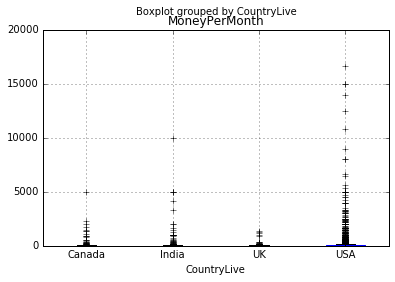

In [192]:
fig, ax = plt.subplots()

data.boxplot(by='CountryLive', column='MoneyPerMonth', ax=ax)

ax.set_ylim([0, 20000])
ax.set_xticklabels(['Canada','India', 'UK', 'USA'])

Few participants in india spend 5000 or more, the money may be spend on attending bootcamps.

In [198]:
data_india_outlier = data[(data['CountryLive']=='India') & (data['MoneyPerMonth']>=3000)]
data = data.drop(data_india_outlier.index)


None of these participants attended bootcamp. May be due to other reasons such as payment for attending colleague. Delete the outliers from data. 

In [200]:
data.groupby(['CountryLive'])['MoneyPerMonth'].agg(['mean','median',pd.Series.mode])

,mean,median,mode
CountryLive,,,
Canada,113.510961,0.000000,0.0
India,65.758763,0.000000,0.0
United Kingdom,45.534443,0.000000,0.0
United States of America,227.997996,3.333333,0.0


## Conclusion
From analyzing the survey data, there is concrete evidence that US would be a good market to invest in advertisement. The second option between India and UK is not so clear. From the statistics, India has more pontential customers and spent more money per month. Further surveys should be conducted for these 2 markets.